In [1]:
import pandas as pd
train_previous = pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/trainprevious./trainprevloans.csv')
train_perf = pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/trainperf.csv')
train_demo = pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/traindemographics.csv')
test_previous = pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/testpreviousloans/testprevloans.csv')
test_perf = pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/testperf.csv')
test_demo = pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/testdemographics.csv')
sample =pd.read_csv('https://raw.githubusercontent.com/Rupeshbhardwaj002/SuperLender-Smarter-Loans-with-Data-Driven-Decisions/refs/heads/main/data/SampleSubmission%20(3).csv')

In [2]:
train_previous.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40.000000,2016-08-15 17:22:32.000000,10000.0,13000.0,30,2016-09-01 16:06:48.000000,NaN,2016-09-14 00:00:00.000000,2016-09-01 15:51:43.000000
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07.000000,2017-04-28 17:38:53.000000,10000.0,13000.0,30,2017-05-28 14:44:49.000000,NaN,2017-05-30 00:00:00.000000,2017-05-26 00:00:00.000000
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25.000000,2017-03-05 09:56:19.000000,20000.0,23800.0,30,2017-04-26 22:18:56.000000,NaN,2017-04-04 00:00:00.000000,2017-04-26 22:03:47.000000
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55.000000,2017-04-09 17:25:42.000000,10000.0,11500.0,15,2017-04-24 01:35:52.000000,NaN,2017-04-24 00:00:00.000000,2017-04-24 00:48:43.000000
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57.000000,2017-06-17 08:29:50.000000,10000.0,11500.0,15,2017-07-14 21:18:43.000000,NaN,2017-07-03 00:00:00.000000,2017-07-14 21:08:35.000000


In [3]:
temp_train = pd.merge(train_previous, train_perf, on='customerid',how='left')
train = pd.merge(temp_train, train_demo, on='customerid', how='left')

temp_test = pd.merge(test_previous, test_perf, on='customerid',how='left')
test = pd.merge(temp_test, test_demo, on='customerid', how='left')
test_orignal_customer_id = test['customerid']
print(train.shape)
print(test['customerid'].nunique(dropna=False))


(18203, 29)
1442


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18203 entries, 0 to 18202
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customerid                  18203 non-null  object 
 1   systemloanid_x              18203 non-null  int64  
 2   loannumber_x                18203 non-null  int64  
 3   approveddate_x              18203 non-null  object 
 4   creationdate_x              18203 non-null  object 
 5   loanamount_x                18203 non-null  float64
 6   totaldue_x                  18203 non-null  float64
 7   termdays_x                  18203 non-null  int64  
 8   closeddate                  18203 non-null  object 
 9   referredby_x                1028 non-null   object 
 10  firstduedate                18203 non-null  object 
 11  firstrepaiddate             18203 non-null  object 
 12  systemloanid_y              18203 non-null  int64  
 13  loannumber_y                182

MANUALLY DOING LABEL ENCODING

In [5]:
train = train.drop(['bank_branch_clients'], axis=1)
test = test.drop(['bank_branch_clients'], axis=1)
print(train.columns)

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'approveddate_x',
       'creationdate_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'closeddate', 'referredby_x', 'firstduedate', 'firstrepaiddate',
       'systemloanid_y', 'loannumber_y', 'approveddate_y', 'creationdate_y',
       'loanamount_y', 'totaldue_y', 'termdays_y', 'referredby_y',
       'good_bad_flag', 'birthdate', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients'],
      dtype='object')


In [6]:
train['approveddate_x'] = pd.to_datetime(train['approveddate_x'], errors='coerce')
train['birthdate'] = pd.to_datetime(train['birthdate'], errors='coerce')
train['creationdate_x'] = pd.to_datetime(train['creationdate_x'], errors='coerce')
train['closeddate'] = pd.to_datetime(train['closeddate'], errors='coerce')

# Age at time of loan
train['age'] = (train['approveddate_x'] - train['birthdate']).dt.days // 365

# Loan duration
train['loan_duration_days'] = (train['closeddate'] - train['approveddate_x']).dt.days

# Time since account creation
train['days_since_creation'] = (pd.Timestamp.now() - train['creationdate_x']).dt.days

# Month and weekday of approval
train['approval_month'] = train['approveddate_x'].dt.month
train['approval_weekday'] = train['approveddate_x'].dt.weekday

train.drop(['approveddate_x', 'birthdate', 'creationdate_x', 'closeddate'], axis=1, inplace=True)

In [7]:
test['approveddate_x'] = pd.to_datetime(test['approveddate_x'], errors='coerce')
test['birthdate'] = pd.to_datetime(test['birthdate'], errors='coerce')
test['creationdate_x'] = pd.to_datetime(test['creationdate_x'], errors='coerce')
test['closeddate'] = pd.to_datetime(test['closeddate'], errors='coerce')

# Age at time of loan
test['age'] = (test['approveddate_x'] - test['birthdate']).dt.days // 365

# Loan duration
test['loan_duration_days'] = (test['closeddate'] - test['approveddate_x']).dt.days

# Time since account creation
test['days_since_creation'] = (pd.Timestamp.now() - test['creationdate_x']).dt.days

# Month and weekday of approval
test['approval_month'] = test['approveddate_x'].dt.month
test['approval_weekday'] = test['approveddate_x'].dt.weekday

test.drop(['approveddate_x', 'birthdate', 'creationdate_x', 'closeddate'], axis=1, inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in train.columns:
  if(train[col].dtype == object):
    train[col] = encoder.fit_transform(train[col])

for col in test.columns:
  if(test[col].dtype == object):
    test[col] = encoder.fit_transform(test[col])
train = train.fillna(0)
test = test.fillna(0)

USING LOOP FOR ENCODING BECAUSE A LOT OF WORK INCREASE IF WE MANUALLY DO EVRY FEATURE SPECIALLY IN MORE LARGE DATASETS.

In [9]:
print(train.columns)
print(test.columns)

Index(['customerid', 'systemloanid_x', 'loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'referredby_x', 'firstduedate',
       'firstrepaiddate', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'referredby_y', 'good_bad_flag', 'bank_account_type', 'longitude_gps',
       'latitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'age', 'loan_duration_days',
       'days_since_creation', 'approval_month', 'approval_weekday'],
      dtype='object')
Index(['customerid', 'systemloanid_x', 'loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'referredby_x', 'firstduedate',
       'firstrepaiddate', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'referredby_y', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'employment_statu

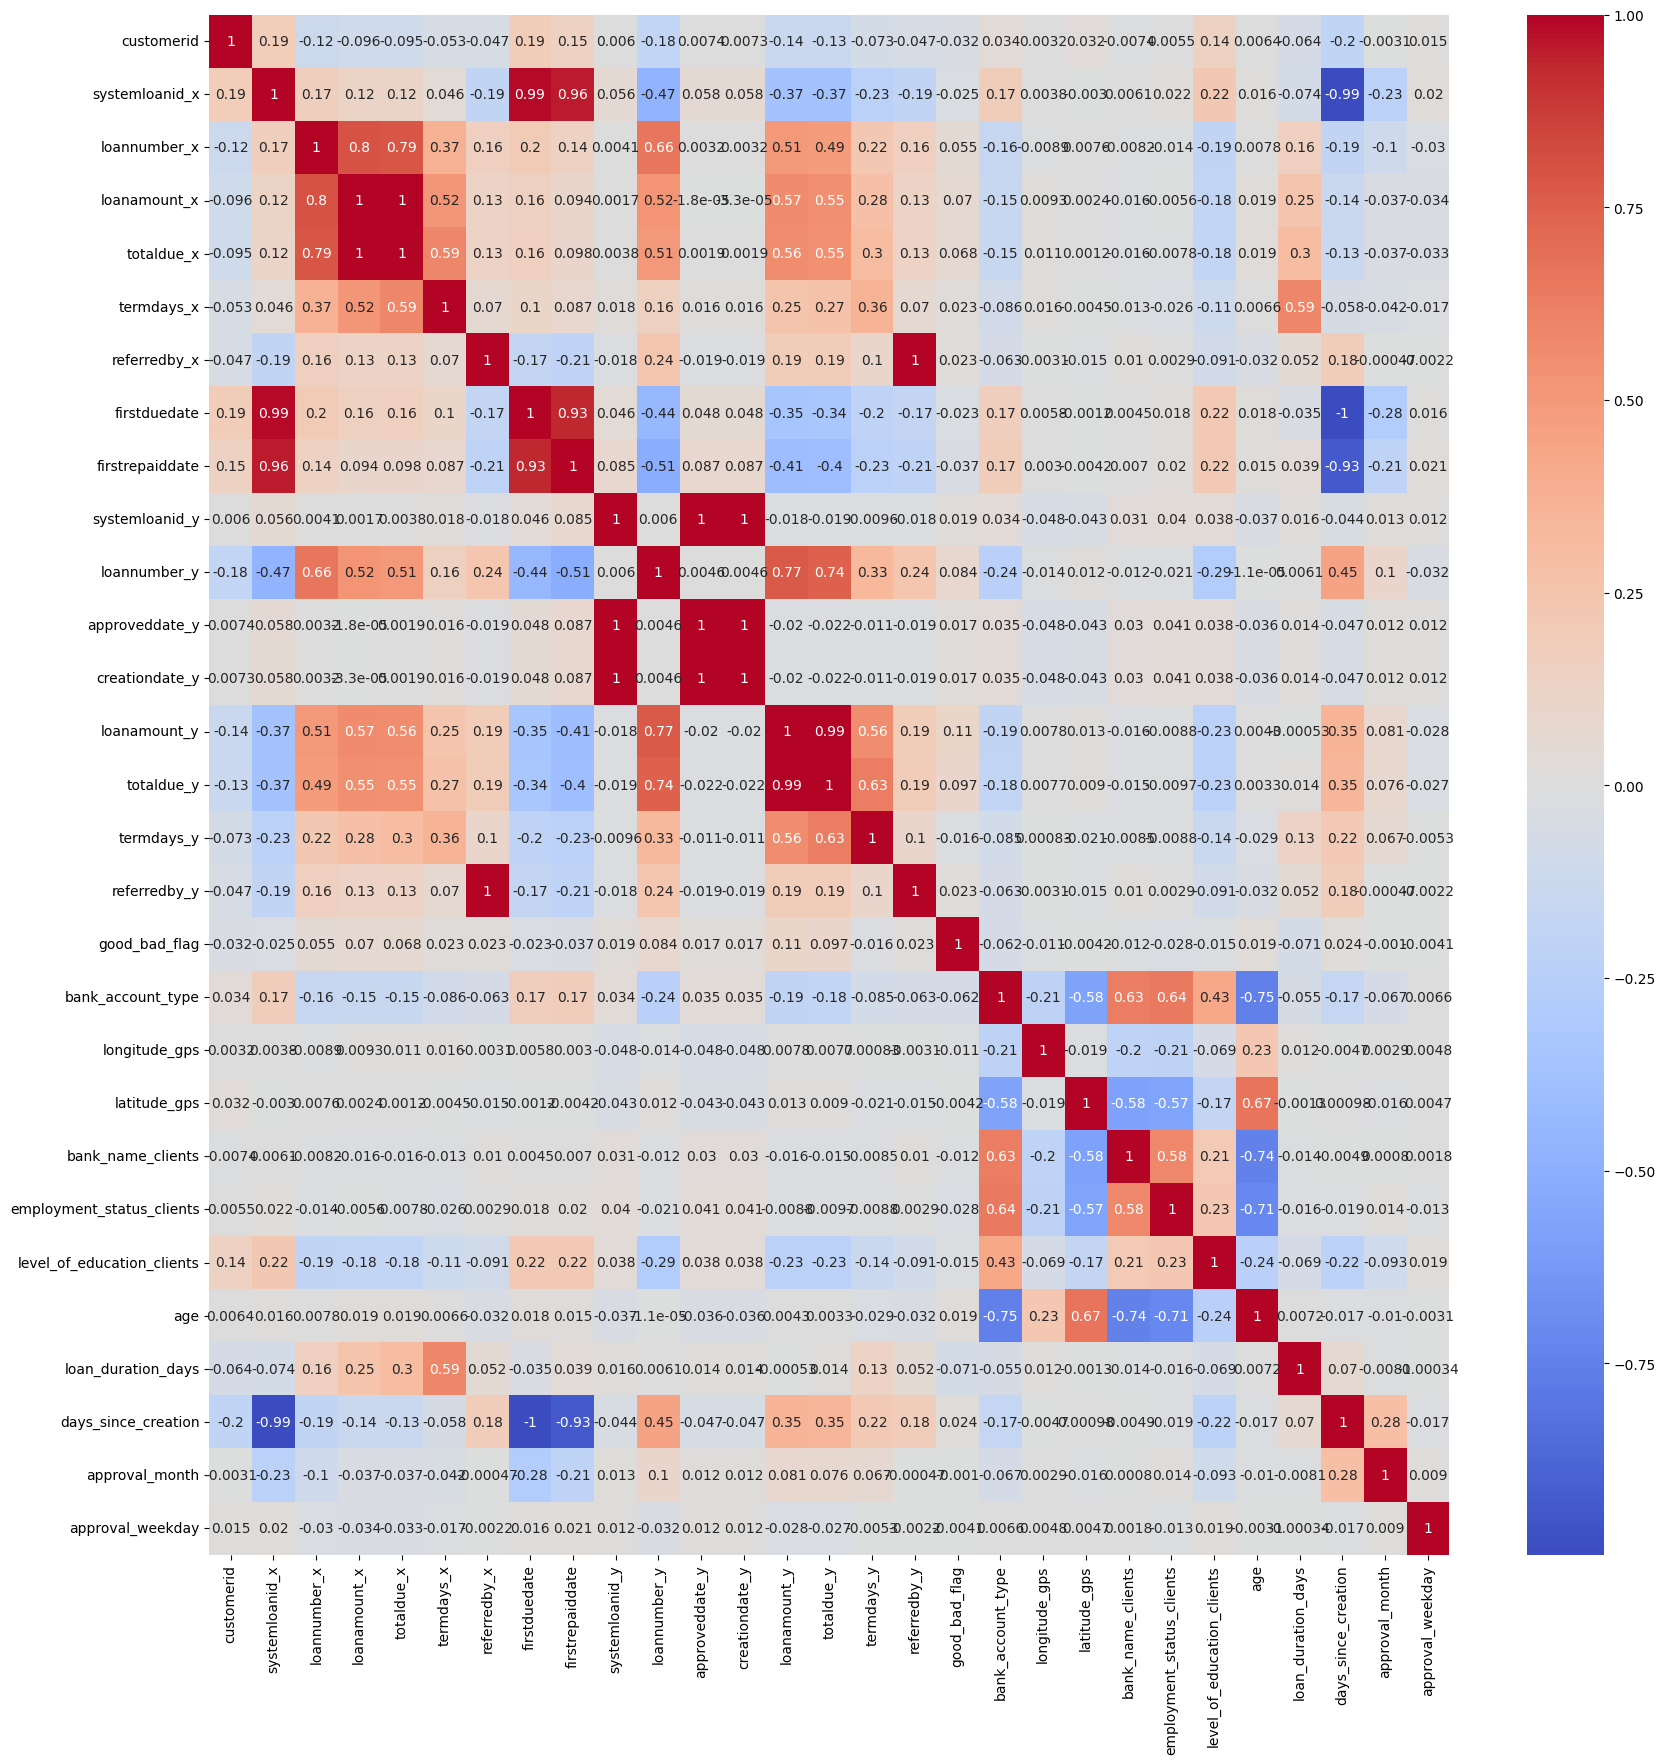

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
corr = train.corr()
coorelated_features = corr['good_bad_flag'].sort_values(ascending=False)
print(coorelated_features)

good_bad_flag                 1.000000
loanamount_y                  0.108371
totaldue_y                    0.097243
loannumber_y                  0.084015
loanamount_x                  0.069605
totaldue_x                    0.067799
loannumber_x                  0.055343
days_since_creation           0.024049
referredby_y                  0.023436
referredby_x                  0.023436
termdays_x                    0.023006
systemloanid_y                0.019352
age                           0.019248
approveddate_y                0.017334
creationdate_y                0.017321
approval_month               -0.001012
approval_weekday             -0.004146
latitude_gps                 -0.004234
longitude_gps                -0.010537
bank_name_clients            -0.011931
level_of_education_clients   -0.015135
termdays_y                   -0.016092
firstduedate                 -0.022507
systemloanid_x               -0.024516
employment_status_clients    -0.028381
customerid               

NOW WE WILL DIVIDE OUR DATASET IN X AND Y . AS WE KNOW TEST DATA ONLY CONATAINS INPUTS HENCE IT DOESN'T NEEDS TO BE ANYTHING CHANGED

In [12]:
X_train = train[['loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'referredby_x', 'firstduedate',
       'firstrepaiddate', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'referredby_y', 'bank_account_type', 'longitude_gps', 'bank_name_clients',
        'employment_status_clients','level_of_education_clients', 'age',
        'loan_duration_days','days_since_creation']]
Y_train = train['good_bad_flag']
test =  test[['loannumber_x', 'loanamount_x',
       'totaldue_x', 'termdays_x', 'referredby_x', 'firstduedate',
       'firstrepaiddate', 'systemloanid_y', 'loannumber_y', 'approveddate_y',
       'creationdate_y', 'loanamount_y', 'totaldue_y', 'termdays_y',
       'referredby_y', 'bank_account_type', 'longitude_gps', 'bank_name_clients',
        'employment_status_clients','level_of_education_clients', 'age',
        'loan_duration_days','days_since_creation']]

In [13]:
X_train.head()

,loannumber_x,loanamount_x,totaldue_x,termdays_x,referredby_x,firstduedate,firstrepaiddate,systemloanid_y,loannumber_y,approveddate_y,...,termdays_y,referredby_y,bank_account_type,longitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,age,loan_duration_days,days_since_creation
0,2,10000.0,13000.0,30,521,122,1432,301994762,12,3388,...,30,521,1,3.43201,1,1,1,44.0,16,3342
1,9,10000.0,13000.0,30,521,302,11125,301994762,12,3388,...,30,521,1,3.43201,1,1,1,45.0,29,3086
2,8,20000.0,23800.0,30,521,264,8969,301994762,12,3388,...,30,521,1,3.43201,1,1,1,45.0,52,3141
3,5,10000.0,11500.0,15,521,278,8686,301966580,7,828,...,15,521,1,11.13935,2,1,4,32.0,14,3105
4,2,10000.0,11500.0,15,521,326,16491,301999343,3,3883,...,15,521,2,3.98577,5,1,4,39.0,27,3037


In [14]:
from sklearn.preprocessing import StandardScaler
d = StandardScaler()
X_train = d.fit_transform(X_train)
X_test = d.fit_transform(test)

In [15]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.3 MB/s eta 0:00:00


We found the best parameters in our other file so there is no need to use gridsearchcv because it takes time to train the model so our best parametrs was - > Best: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

In [16]:
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from catboost import CatBoostClassifier
# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)),
    ('xgb', xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=100, use_label_encoder=False, eval_metric='auc', random_state=42)),
    ('cat', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, verbose=0, random_seed=42))
]


meta_learner = LogisticRegression()

# Create stacking classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Fit stack model on training partition
stack_model.fit(X_train, Y_train)
y_pred = stack_model.predict(X_test)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:54:54] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:55:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:55:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [17]:
print(y_pred)

[0 1 1 ... 1 1 0]


In [18]:
test.columns

Index(['loannumber_x', 'loanamount_x', 'totaldue_x', 'termdays_x',
       'referredby_x', 'firstduedate', 'firstrepaiddate', 'systemloanid_y',
       'loannumber_y', 'approveddate_y', 'creationdate_y', 'loanamount_y',
       'totaldue_y', 'termdays_y', 'referredby_y', 'bank_account_type',
       'longitude_gps', 'bank_name_clients', 'employment_status_clients',
       'level_of_education_clients', 'age', 'loan_duration_days',
       'days_since_creation'],
      dtype='object')

In [19]:
pred_df = pd.DataFrame({'customerid' : test_orignal_customer_id,
                       'Good_Bad_flag' : y_pred})

final_submission = sample[['customerid']].merge(pred_df, on='customerid', how='left')
# Ensure no missing IDs
final_submission['Good_Bad_flag'] = final_submission['Good_Bad_flag'].fillna(0)
final_submission.to_csv('final_submisson.csv', index=False)

from google.colab import files
files.download('final_submisson.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
import joblib

# Save the trained stacking model
joblib.dump(stack_model, 'best_model.pkl')

# Save the StandardScaler
joblib.dump(d, 'scaler.pkl')

print("Model and scaler saved successfully!")

files.download('best_model.pkl')
files.download('scaler.pkl')

Model and scaler saved successfully!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>